In [10]:
# Graphing functions
def graph_approx(x,y):
    """Inputs our array of inputs x and our approximated array of outputs y to make a graph."""
    import matplotlib.pyplot as plt

    # Plot our values
    plt.plot(x, y, color="black")
    
    # Make cosmetic expectations and display graph
    plt.grid()
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.show()
    
def graph_all(x, y_approx, y_exact):
    """Inputs our array of inputs x, our approximated array of outputs y,
    and our known exact y to make a graph."""
    import matplotlib.pyplot as plt
    
    # Plot our values
    plt.plot(x, y_approx, color="black", linestyle="dotted")
    plt.plot(x, y_exact, color="black")
    
    # Make cosmetic expectations and display graph
    plt.grid()
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.show()

    
    
    
# Matrix generation functions
def M_matrix(h, k, dimension):
    """Used to generate a matrix M that solves M*y(x)=I.
    
    We want each row to contain -1-hk, 1 with the 1's on our diagonal"""
    import numpy as np
    
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal -1-hk
    matrix = np.zeros((dimension-1,dimension-1))
    np.fill_diagonal(matrix, - 1 - h * k)
    
    
    
    
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-1,1), dtype = "int8")
    matrix = np.hstack((matrix, row))

    column = np.zeros((1,dimension), dtype = "int8")
    matrix = np.vstack((column, matrix))
    
    # Replace the new diagonals with 1
    np.fill_diagonal(matrix,int(1))
    
    
    
    
    return matrix

def I_matrix(h, k, y_initial, height):
    """Used to generate a vector I of a specific height that solves M*y(x)=I.
    We want the first row to be (hk+1)*y(0) and everything else to be 0."""
    import numpy as np
    
    # Generate a 0 vector that's 1 unit shorter than its intended height
    vector = np.zeros((height-1,1))
    
    # Append (hk+1)y(x_0) to the front of it
    vector = np.append( np.array([ [(h * k + 1) * y_initial] ]) , vector )
    
    
    
    
    return vector

[ 20. -40.   0.   0.   0.   0.   0.   0.   0.   0.]


In [11]:
def ypx_to_kyx(constant, y_initial, x_max, interv_num):
    """With the assumption that the minimum x is x=0 and our initial value is at x=0,
    we input an initial value, a maximum input value, and the number of intervals to
    solve the differential equation y'(x) = k * y(x) with our constant being k.
    
    The EXACT solution to this DE is y(x) = y_0 * e^(kx)."""
    import numpy as np
    from scipy.linalg import lu_factor
    from scipy.linalg import lu_solve
    from time import time
    
    begin = round(time(),2)
    
    # Make our array of x-inputs and our interval width constant
    x_min = 0
    x_val = np.linspace(x_min, x_max, interv_num+1)
    interv_width = (x_max - x_min) / interv_num
    
    
    
    
    # Make our M matrix and I array to assemble the equation M * y(x) = I
    m_matrix = M_matrix(interv_width, constant, interv_num)
    i_matrix = I_matrix(interv_width, constant, y_initial, interv_num)
    

    
    
    # We know have My(x) = I, and it's better to do the LU decomposition to get y(x) than find the inverse
    lu, piv = lu_factor(m_matrix)
    y_val = lu_solve((lu, piv), i_matrix)
    
    #Append our initial y-value since y_val is everything except the first value
    y_val = np.append( np.array([y_initial]) , y_val )
    
    
    
    
    # Make our array of exact y-values and make a graph with our approximated and exact values
    y_exact = y_initial * np.exp(constant * x_val)
    graph_all(x_val, y_val, y_exact)

    
    end = round(time(),2)
    print(f"Finished in {round(end-begin,2)} seconds.")

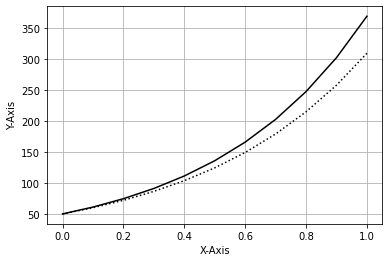

Finished in 0.15 seconds.


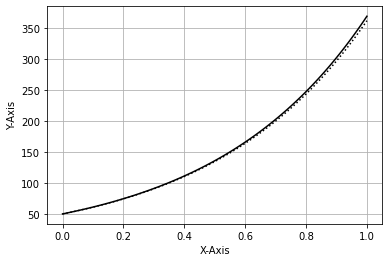

Finished in 0.09 seconds.


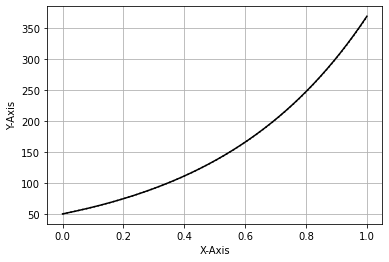

Finished in 0.11 seconds.


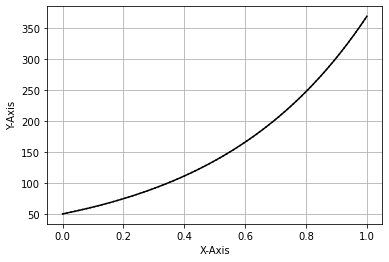

Finished in 13.38 seconds.


In [23]:
# Find the solution to y'(x)=y(x), y(0)=4, y'(0)=2, 0<x<10
# Format is ypx_to_kyx(constant, y_initial, x_max, interv_num)
for i in range (4):
    ypx_to_kyx(2, 50, 1, 10 ** (i+1))